In [ ]:
import os
import numpy as np
import pandas as pd
from skimage import io
import seaborn as sns
import keras.utils as image
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from plotly.subplots import make_subplots

In [ ]:
img_dir ="./data/IDC_regular_ps50_idx5/"
dir = os.listdir(img_dir)[:30]

In [ ]:
os.mkdir("dataset")

In [ ]:
import shutil
for patient in dir:   
  for i in os.listdir(img_dir + patient + '/0'):
    src = os.path.join(img_dir + patient + '/0', i)
    dst = os.path.join("dataset", i)
    shutil.copyfile(src, dst)
  for i in os.listdir(img_dir + patient + '/1'):
    src = os.path.join(img_dir + patient + '/1', i)
    dst = os.path.join("dataset", i)
    shutil.copyfile(src, dst)

In [ ]:
dataset = os.listdir('./dataset')

In [ ]:
df = pd.DataFrame(dataset, columns=['path'])
df.head()

,path
0,9073_idx5_x2901_y801_class0.png
1,15515_idx5_x1901_y601_class0.png
2,15515_idx5_x2401_y401_class0.png
3,13666_idx5_x1401_y851_class0.png
4,13404_idx5_x301_y2551_class0.png


# **About dataset/plotting images**

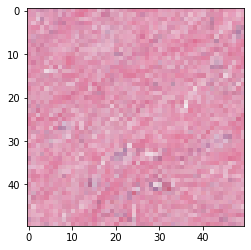

In [ ]:
img = plt.imread("dataset/" + dataset[0])
plt.imshow(img)

In [ ]:
neg = ["dataset/" + i for i in dataset if i[-5] == '0']
pos = ["dataset/" + i for i in dataset if i[-5] == '1']
arr = [i[-5] for i in dataset]

In [ ]:
print(f'Total number of images: {len(neg)+len(pos)}')
print(f'Number of IDC(-) Images: {len(neg)}')
print(f'Number of IDC(+) Images: {len(pos)}')

Total number of images: 27328
Number of IDC(-) Images: 16827
Number of IDC(+) Images: 10501


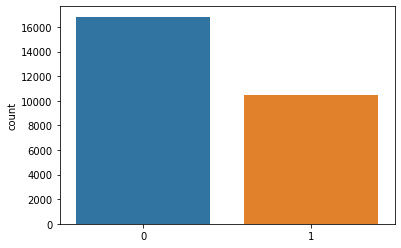

In [ ]:
sns.countplot(x = arr)

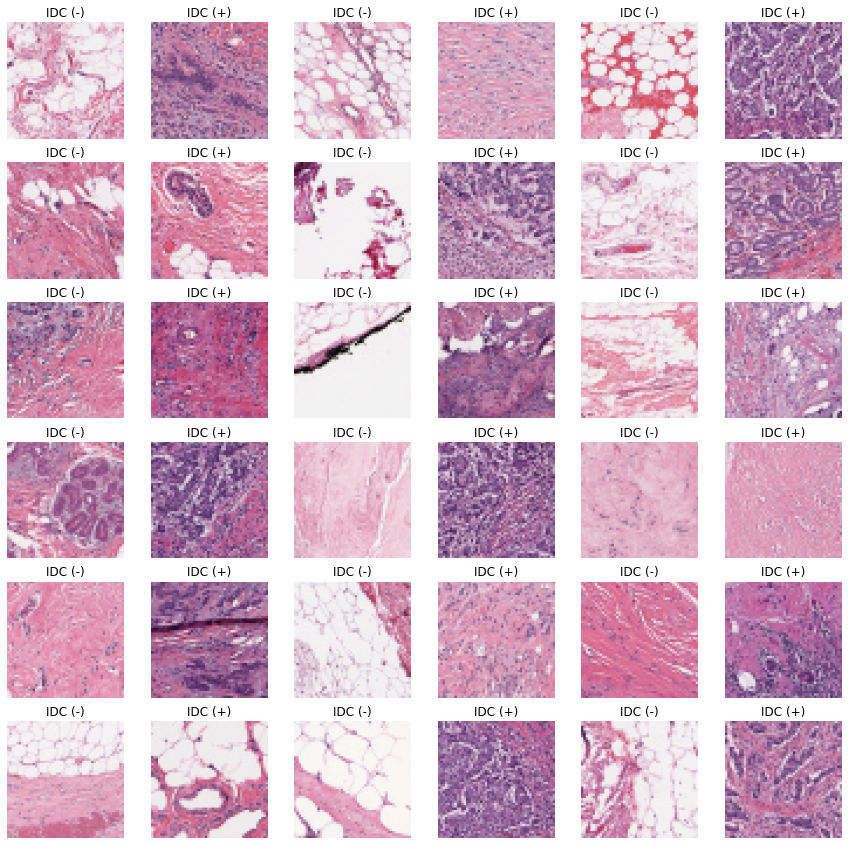

In [ ]:
plt.figure(figsize = (15, 15))
some_non = np.random.randint(0, len(neg), 18)
some_can = np.random.randint(0, len(pos), 18)

s = 0
for num in some_non:    
  img = image.load_img((neg[num]), target_size=(100, 100))
  img = image.img_to_array(img)
  
  plt.subplot(6, 6, 2*s+1)
  plt.axis('off')
  plt.title('IDC (-)')
  plt.imshow(img.astype('uint8'))
  s += 1
s = 1
for num in some_can:
  
      img = image.load_img((pos[num]), target_size=(100, 100))
      img = image.img_to_array(img)
      
      plt.subplot(6, 6, 2*s)
      plt.axis('off')        
      plt.title('IDC (+)')
      plt.imshow(img.astype('uint8'))
      s += 1

# **Preprocessing**

In [ ]:
df['target'] = df['path'].apply(lambda x : int(x.split('_')[4][5]))
df['patient_id'] = df['path'].apply(lambda x : x.split('_')[0])
df['x'] = df['path'].apply(lambda x : x.split('_')[2][1:])
df['y'] = df['path'].apply(lambda x : x.split('_')[3][1:])
df['array'] = df.apply(lambda x : io.imread("dataset/" + x['path']), axis = 1)
df['grey_array'] = df.apply(lambda x : io.imread("dataset/" + x['path'], as_gray = True).flatten(), axis = 1)
df['size'] = df['grey_array'].apply(lambda x : x.shape[0])

In [ ]:
df.drop(df[df['size'] != 2500].index,inplace=True) 


# **PCA**

In [ ]:
df.head()

,path,target,patient_id,x,y,array,grey_array,size,pca
0,9073_idx5_x2901_y801_class0.png,0,9073,2901,801,"[[[223, 147, 177], [218, 156, 183], [212, 146,...","[0.6482862745098039, 0.6710654901960784, 0.638...",2500,"[0.16315721982159784, -0.01908993377884289, 0...."
1,15515_idx5_x1901_y601_class0.png,0,15515,1901,601,"[[[159, 92, 134], [185, 99, 143], [152, 80, 12...","[0.42849294117647063, 0.47234274509803925, 0.3...",2500,"[7.494386393459862, 0.30093093857629644, 0.364..."
2,15515_idx5_x2401_y401_class0.png,0,15515,2401,401,"[[[236, 221, 230], [221, 202, 212], [242, 238,...","[0.8817113725490197, 0.8108176470588235, 0.937...",2500,"[-2.326386891548303, 4.376007869212065, 0.9906..."
3,13666_idx5_x1401_y851_class0.png,0,13666,1401,851,"[[[234, 213, 223], [223, 184, 200], [227, 181,...","[0.855621568627451, 0.7585925490196078, 0.7535...",2500,"[-5.8288383058277216, -0.23775803381979216, -0..."
4,13404_idx5_x301_y2551_class0.png,0,13404,301,2551,"[[[228, 162, 189], [235, 189, 206], [238, 207,...","[0.6979282352941176, 0.7843164705882353, 0.841...",2500,"[-7.791141938429784, -1.8318526180546981, 2.44..."


In [ ]:
# image shape before applying PCA. 
df['array'][0].shape

(50, 50, 3)

In [ ]:
grey_image_array = [i for i in df['grey_array']]
from sklearn.decomposition import PCA
images_pca = PCA(0.9)
images_pca.fit(grey_image_array);

In [ ]:
df['pca'] = df['grey_array'].apply(lambda x: images_pca.transform([x]).flatten())
df.head()

,path,target,patient_id,x,y,array,grey_array,size,pca
0,9073_idx5_x2901_y801_class0.png,0,9073,2901,801,"[[[223, 147, 177], [218, 156, 183], [212, 146,...","[0.6482862745098039, 0.6710654901960784, 0.638...",2500,"[0.16315721982159784, -0.01908993377884289, 0...."
1,15515_idx5_x1901_y601_class0.png,0,15515,1901,601,"[[[159, 92, 134], [185, 99, 143], [152, 80, 12...","[0.42849294117647063, 0.47234274509803925, 0.3...",2500,"[7.494386393459862, 0.30093093857629644, 0.364..."
2,15515_idx5_x2401_y401_class0.png,0,15515,2401,401,"[[[236, 221, 230], [221, 202, 212], [242, 238,...","[0.8817113725490197, 0.8108176470588235, 0.937...",2500,"[-2.326386891548303, 4.376007869212065, 0.9906..."
3,13666_idx5_x1401_y851_class0.png,0,13666,1401,851,"[[[234, 213, 223], [223, 184, 200], [227, 181,...","[0.855621568627451, 0.7585925490196078, 0.7535...",2500,"[-5.8288383058277216, -0.23775803381979216, -0..."
4,13404_idx5_x301_y2551_class0.png,0,13404,301,2551,"[[[228, 162, 189], [235, 189, 206], [238, 207,...","[0.6979282352941176, 0.7843164705882353, 0.841...",2500,"[-7.791141938429784, -1.8318526180546981, 2.44..."


In [ ]:
# image shape after applying PCA.
df['pca'][0].shape 

(622,)

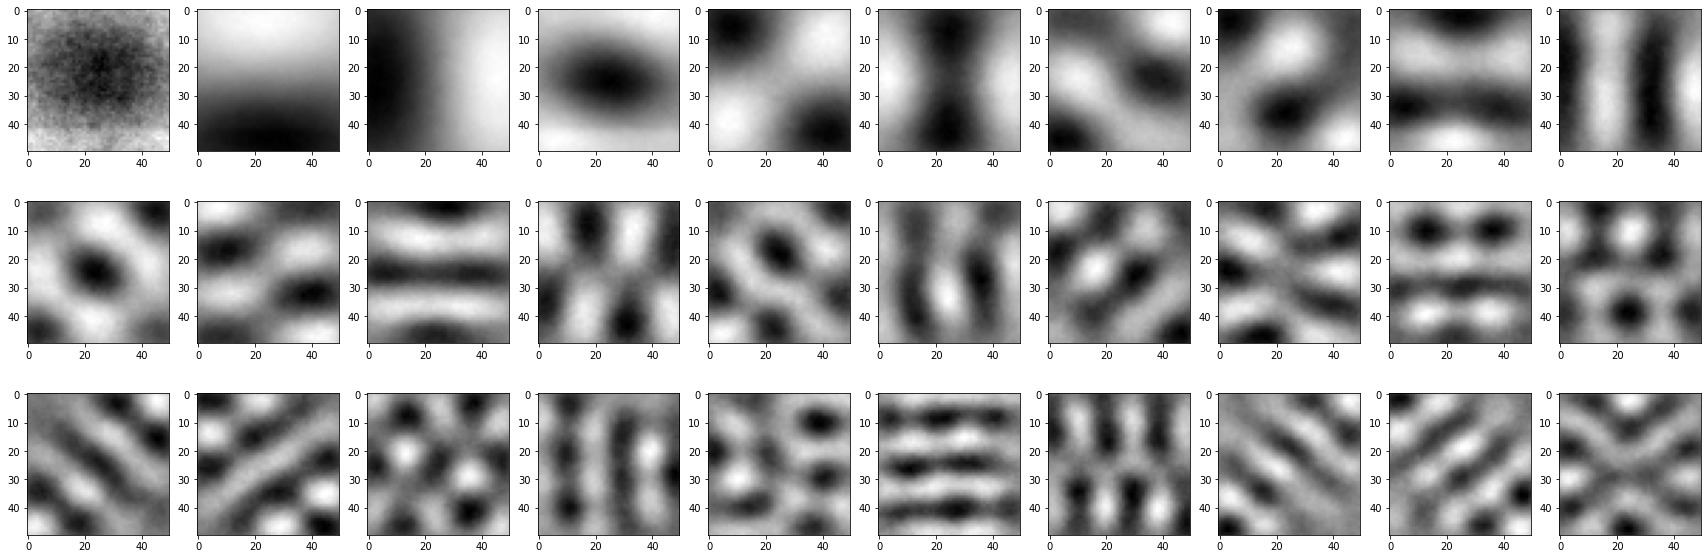

In [ ]:
# visualizing the first 30 principle components
fig, axes = plt.subplots(3, 10, figsize=(30, 10))
for i, ax in enumerate(axes.flat):
    # return each of the components, and reshape them to 50x50
    ax.imshow(images_pca.components_[i].reshape(50, 50), cmap='binary_r')

In [ ]:
pca_array = np.array([i for i in df['pca']])
pca_array

array([[ 1.63157220e-01, -1.90899338e-02,  1.64300397e-02, ...,
         3.88136221e-02,  3.52651157e-02, -6.12665009e-03],
       [ 7.49438639e+00,  3.00930939e-01,  3.64458274e-01, ...,
        -2.47801813e-02,  2.19668083e-02, -4.39607414e-02],
       [-2.32638689e+00,  4.37600787e+00,  9.90665231e-01, ...,
        -5.55544015e-02, -2.40567148e-02,  1.84490554e-01],
       ...,
       [-2.99152919e+00, -1.89118544e+00,  1.99921823e+00, ...,
        -1.86882891e-01, -2.07816436e-01,  5.10693733e-02],
       [-1.75496245e+00,  1.19234319e+00, -2.03576990e+00, ...,
        -8.18318940e-02, -1.72952936e-01, -1.64817157e-01],
       [ 5.98777053e+00,  1.44056226e-01, -2.10037834e-01, ...,
         1.24254723e-02,  6.36032167e-02,  7.09816997e-02]])

In [ ]:
# explained get the cumalitive sum of the explained variance ratio for each principle component
evr = np.cumsum(images_pca.explained_variance_ratio_)
import plotly.graph_objects as go
# plot the explained variance ratio
fig = go.Figure(data=go.Scatter(y = evr,line=dict(color='#ff70db')))
fig.update_layout(title='Explained Variance Ratio After PCA')
fig.update_layout(xaxis_title='Number of Principle Components')
fig.update_layout(yaxis_title='Cumalitive Explained Variance Ratio')
fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27115 entries, 0 to 27327
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   path        27115 non-null  object
 1   target      27115 non-null  object
 2   patient_id  27115 non-null  object
 3   x           27115 non-null  object
 4   y           27115 non-null  object
 5   array       27115 non-null  object
 6   grey_array  27115 non-null  object
 7   size        27115 non-null  int64 
 8   pca         27115 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.1+ MB


In [ ]:
# count of images per patient
s1 = df.groupby('patient_id')['target'].count()
# ratio of cancerous to non-cancerous images per-patient
s2 = df.groupby('patient_id')['target'].mean()

# Merge the series into one dataframe that uses the same index
df_summary = pd.concat([s1,s2],axis = 1)
df_summary.columns = ['n_patches/patient','cancer_ratio']
display(df_summary)

,n_patches/patient,cancer_ratio
patient_id,,
10256,468,0.250000
10257,635,0.327559
10262,1807,0.417266
10293,870,0.254023
10299,2102,0.640818
12242,1093,0.392498
12811,243,0.518519
12818,1610,0.586957
12880,1934,0.593071


In [ ]:
# Lets get a statistical summary of our dataframe
display (df_summary.describe())

,n_patches/patient,cancer_ratio
count,30.000000,30.000000
mean,903.833333,0.381238
std,542.151657,0.194005
min,152.000000,0.075540
25%,475.250000,0.245066
50%,821.000000,0.358385
75%,1169.500000,0.567882
max,2102.000000,0.747228


In [ ]:
trace_0=go.Scatter(name='# Patches vs Cancer Ratio ', x = df_summary['n_patches/patient'], \
                   y = df_summary['cancer_ratio'], mode = 'markers', marker = dict(size = 16, \
                   color = df_summary['cancer_ratio'], colorscale = [[0.0, "#ff87c9"], [1.0, "#8634eb"]]))

fig = make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.05,
                      subplot_titles=("Number of Patches per Patient vs Cancer Ratio of Image"))
fig.update_yaxes(title_text="Percentage", row=3, col=1)
fig.update_xaxes(title_text="Number of Patches", row=3, col=1)
fig.append_trace(trace_0,1,1)
fig.show()

# **Support Vector Machine Model :-**

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
X_pca_train, X_pca_test, y_pca_train, y_pca_test = \
train_test_split(pca_array, np.array(df['target']).astype(np.int64), train_size=0.7, shuffle = True)


In [ ]:
X_pca_train

array([[ 2.92403083e+00,  4.04910515e-01, -6.67837534e-01, ...,
        -1.17345153e-01, -2.19508794e-03, -6.09899921e-02],
       [ 7.87620375e-01, -1.67774385e-01,  2.77848862e-01, ...,
         1.37616641e-02, -1.97205908e-02,  4.12234484e-02],
       [ 8.65710573e+00,  4.36834295e-01, -1.91482127e-01, ...,
         1.20350126e-01, -2.34511427e-01, -7.73357223e-02],
       ...,
       [-3.18180581e+00, -1.75175515e+00,  3.52663388e+00, ...,
         2.46338179e-02,  2.74282738e-02, -7.58890566e-02],
       [ 4.23930267e+00,  7.29309342e+00, -8.00676047e+00, ...,
        -1.29924073e-03, -3.77839756e-02,  4.92094912e-03],
       [-8.02561301e+00,  1.78981309e+00, -9.64155046e-01, ...,
         6.92287787e-02,  6.34715988e-03, -2.71679922e-01]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



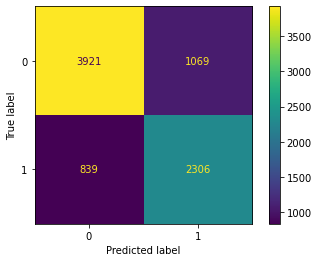

In [ ]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf',gamma = 'auto' )
SVM = svc_rbf.fit(X = X_pca_train,y = y_pca_train)
plot_confusion_matrix(svc_rbf, X_pca_test, y_pca_test)
plt.show()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
Kfold = KFold(n_splits=5, random_state=1, shuffle=True)
accuracyz=cross_val_score(SVM, pca_array, np.array(df['target']).astype(np.int64),cv=Kfold )
print("KfoldCrossVal score using SVM is %s",accuracyz.mean())

KfoldCrossVal score using SVM is %s 0.7800598422700432


# **XGboost Model :-**

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(np.array(X_pca_train),y_pca_train)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = pca_array,y =  np.array(df['target']).astype(np.int64), cv = 5)
print(f"Accuracy train: {accuracies.mean()*100} %")
print(f"Standard Deviation train: {accuracies.std()*100} %")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



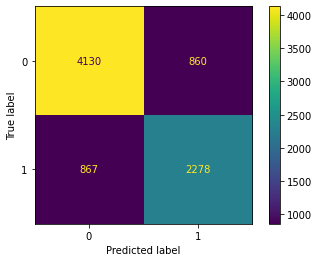

In [ ]:
plot_confusion_matrix(classifier, X_pca_test, y_pca_test)
plot_confusion_matrix.show()

# **CNN MODELS:-**

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
image_array = np.array([i for i in df['array']])
X_img_train, X_img_test, y_img_train, y_img_test =  \
train_test_split(image_array, to_categorical(df['target']), train_size=0.7, shuffle = True) 

In [ ]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv1D, Conv2D, MaxPool2D, MaxPool1D, Flatten, Dense, \
  Dropout, BatchNormalization
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(50,50,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2,activation='sigmoid'))
model.summary()

model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv1d (Conv1D)             (None, 24, 23, 32)        2080      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 23, 32)       1

In [ ]:
Model_1 = model.fit(X_img_train, y_img_train, epochs=10, verbose=1, validation_data=(X_img_test, y_img_test))

Epoch 1/10
637/637 [==============================] - 77s 119ms/step - loss: 0.4277 - accuracy: 0.8418 - val_loss: 0.3427 - val_accuracy: 0.8692
Epoch 2/10
637/637 [==============================] - 74s 116ms/step - loss: 0.3476 - accuracy: 0.8722 - val_loss: 0.3480 - val_accuracy: 0.8527
Epoch 3/10
637/637 [==============================] - 80s 126ms/step - loss: 0.3100 - accuracy: 0.8836 - val_loss: 0.3771 - val_accuracy: 0.8407
Epoch 4/10
637/637 [==============================] - 76s 120ms/step - loss: 0.2685 - accuracy: 0.8975 - val_loss: 0.3272 - val_accuracy: 0.8723
Epoch 5/10
637/637 [==============================] - 73s 114ms/step - loss: 0.2433 - accuracy: 0.9059 - val_loss: 0.3396 - val_accuracy: 0.8753
Epoch 6/10
637/637 [==============================] - 73s 114ms/step - loss: 0.2234 - accuracy: 0.9164 - val_loss: 0.3778 - val_accuracy: 0.8554
Epoch 7/10
637/637 [==============================] - 73s 114ms/step - loss: 0.2033 - accuracy: 0.9218 - val_loss: 0.3506 - val_ac

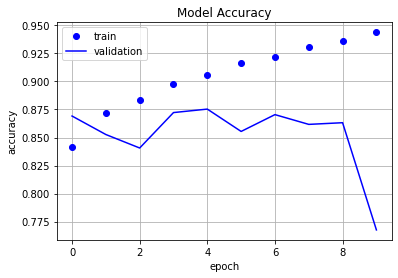

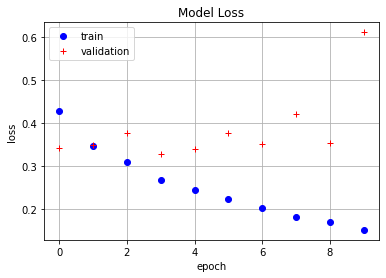

In [ ]:
plt.plot(Model_1.history['accuracy'],'bo')
plt.plot(Model_1.history['val_accuracy'],'b')
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(Model_1.history['loss'],'bo')
plt.plot(Model_1.history['val_loss'],'r+')
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred=model.predict(X_img_test)

273/273 [==============================] - 10s 36ms/step


In [ ]:
Cnn_acc_train=np.array(Model_1.history['accuracy']).mean()
Cnn_acc_train

0.9049261569976806

In [ ]:
model2 = Sequential()
model2.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(pca_array.shape[1], 1)))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Conv1D(32,2,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(32,activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(1,activation='sigmoid'))
model2.summary()

model2.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 598, 16)           48        
                                                                 
 batch_normalization_2 (Batc  (None, 598, 16)          64        
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 598, 16)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 597, 32)           1056      
                                                                 
 batch_normalization_3 (Batc  (None, 597, 32)          128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 597, 32)          

In [ ]:
Model_2 = model2.fit(X_pca_train, y_pca_train, epochs=10, verbose=1, validation_data=(X_pca_test, y_pca_test))

Epoch 1/10
637/637 [==============================] - 34s 52ms/step - loss: 0.4630 - accuracy: 0.7961 - val_loss: 0.4734 - val_accuracy: 0.7863
Epoch 2/10
637/637 [==============================] - 35s 55ms/step - loss: 0.4038 - accuracy: 0.8278 - val_loss: 0.3915 - val_accuracy: 0.8285
Epoch 3/10
637/637 [==============================] - 33s 52ms/step - loss: 0.3790 - accuracy: 0.8380 - val_loss: 0.4089 - val_accuracy: 0.8219
Epoch 4/10
637/637 [==============================] - 37s 58ms/step - loss: 0.3616 - accuracy: 0.8462 - val_loss: 0.4106 - val_accuracy: 0.8205
Epoch 5/10
637/637 [==============================] - 34s 53ms/step - loss: 0.3410 - accuracy: 0.8554 - val_loss: 0.4160 - val_accuracy: 0.8164
Epoch 6/10
637/637 [==============================] - 36s 57ms/step - loss: 0.3189 - accuracy: 0.8645 - val_loss: 0.4314 - val_accuracy: 0.8172
Epoch 7/10
637/637 [==============================] - 34s 53ms/step - loss: 0.2998 - accuracy: 0.8757 - val_loss: 0.4523 - val_accuracy:

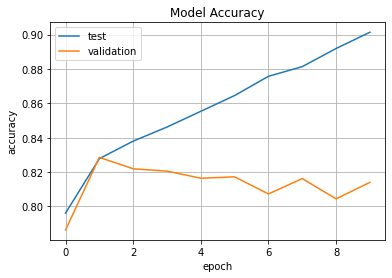

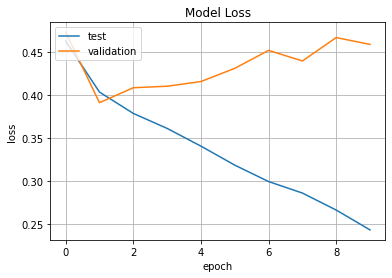

In [ ]:
plt.plot(Model_2.history['accuracy'])
plt.plot(Model_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(Model_2.history['loss'])
plt.plot(Model_2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred1 = model2.predict(X_pca_test)
print(y_pred1)
print()
print(y_pca_test)

273/273 [==============================] - 3s 10ms/step
[[0.5508733 ]
 [0.19495745]
 [0.9894528 ]
 ...
 [0.86944056]
 [0.9970857 ]
 [0.99929976]]

[0 0 1 ... 0 1 1]


In [ ]:
Cnn_acc_test = np.array(Model_2.history['accuracy']).mean()
print(Cnn_acc_test)

0.8578283727169037


# **Decision tree Model:-**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy",min_samples_split=5,
                                     random_state=0)
score = ['accuracy', 'precision', 'recall', 'f1']
results = cross_validate(estimator=decision_tree_model,
                          X=pca_array,
                          y= np.array(df['target']).astype(np.int64),
                          cv=5,
                          scoring=score,
                          return_train_score=True)

print("Training Accuracy scores",results['train_accuracy'])
print("Mean Training Accuracy",results['train_accuracy'].mean()*100)
print("Training Precision scores",results['train_precision'])
print("Mean Training Precision",results['train_precision'].mean())
print("Training Recall scores",results['train_recall'])
print("Mean Training Recall",results['train_recall'].mean())
print("Training F1 scores",results['train_f1'])
print("Mean Training F1 Score",results['train_f1'].mean())
print("Validation Accuracy scores",results['test_accuracy'])
print("Mean Validation Accuracy",results['test_accuracy'].mean()*100)
print("Validation Precision scores",results['test_precision'])
print("Mean Validation Precision",results['test_precision'].mean())
print("Validation Recall scores",results['test_recall'])
print("Mean Validation Recall",results['test_recall'].mean())
print("Validation F1 scores",results['test_f1'])
print("Mean Validation F1 Score",results['test_f1'].mean())


Training Accuracy scores [0.9985709 0.998156  0.9982943 0.998156  0.9984787]
Mean Training Accuracy 99.83311820025816
Training Precision scores [0.9988081  0.99797499 0.99868829 0.99750089 0.99904569]
Mean Training Precision 0.9984035920487578
Training Recall scores [0.9975003  0.99726223 0.99690513 0.99773836 0.99702381]
Mean Training Recall 0.9972859665232596
Training F1 scores [0.99815377 0.99761848 0.99779591 0.99761961 0.99803372]
Mean Training F1 Score 0.9978443011858851
Validation Accuracy scores [0.69039277 0.69979716 0.69537157 0.68947077 0.68320118]
Mean Validation Accuracy 69.16466900239719
Validation Precision scores [0.60105617 0.6095636  0.60738255 0.59811321 0.58861638]
Mean Validation Precision 0.6009463821549088
Validation Recall scores [0.59619048 0.6252381  0.60333333 0.60380952 0.60542599]
Mean Validation Recall 0.6067994832392738
Validation F1 scores [0.59861344 0.61730136 0.60535117 0.60094787 0.59690286]
Mean Validation F1 Score 0.6038233398258319


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



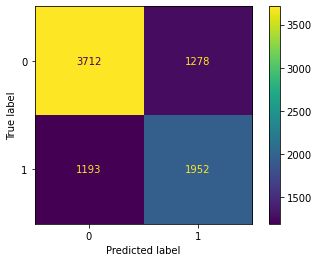

In [ ]:
decision_tree_model.fit(np.array(X_pca_train),y_pca_train)
plot_confusion_matrix(decision_tree_model, X_pca_test, y_pca_test)
plt.show()

In [ ]:
dt_acc_train=results['train_accuracy'].mean() * 100
dt_acc_test=results['test_accuracy'].mean() * 100

In [ ]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='green', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='blue', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()


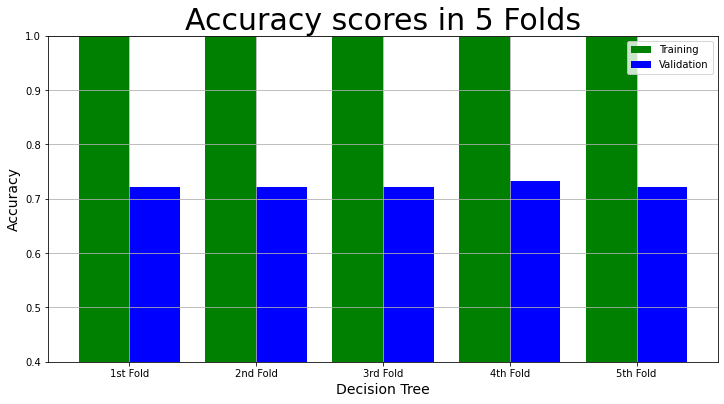

In [ ]:
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            results["train_accuracy"],
            results["test_accuracy"])

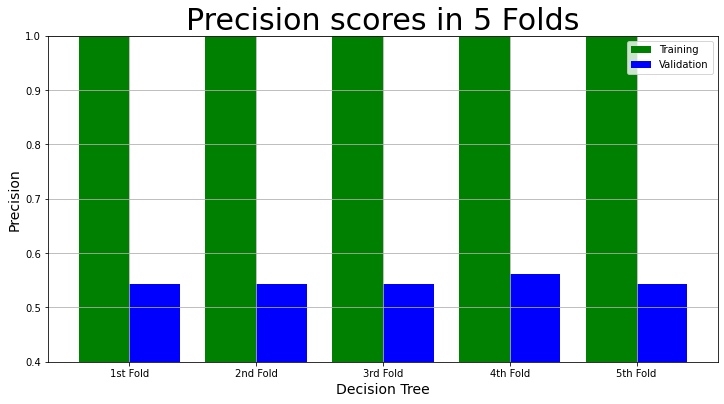

In [ ]:
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            results["train_precision"],
            results["test_precision"])

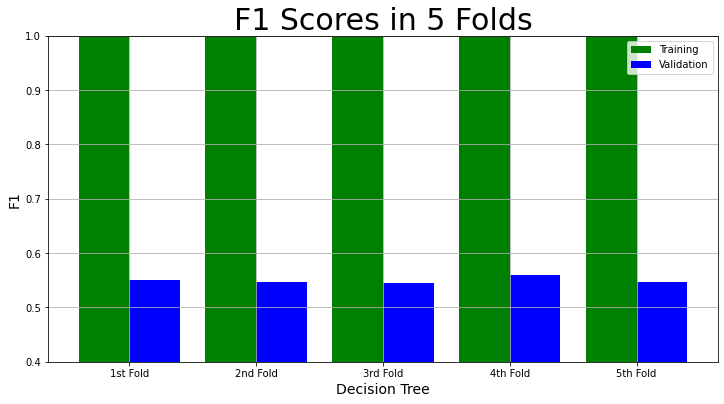

In [ ]:
plot_result(model_name,
            "F1",
            "F1 Scores in 5 Folds",
            results["train_f1"],
            results["test_f1"])

# **Logistic regression**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = LogisticRegression()
acc = cross_val_score(model, pca_array,np.array(df['target']).astype(np.int64), scoring='accuracy', cv=cv, n_jobs=-1)
print(f'Accuracy: {acc}') 

Accuracy: [0.7488475  0.7499539  0.74257791 0.7510603  0.7470035 ]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



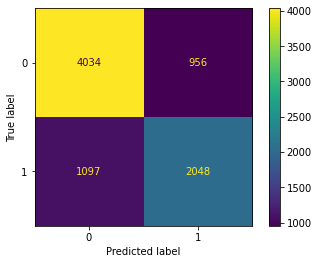

In [ ]:
model.fit(np.array(X_pca_train),y_pca_train)

plot_confusion_matrix(model, X_pca_test, y_pca_test)
plt.show()

# ***Comparing all the above models:-***

In [ ]:
models_names=[]
models_names.append("SVM")
models_names.append("XGboost")
models_names.append("CNN")
models_names.append("Decision Tree")
models_names.append("Logistic regression")
print(models_names)

['SVM', 'XGboost', 'CNN', 'Decision Tree', 'Logistic regression']


In [ ]:
models_train_acc=[]
models_train_acc.append(accuracyz)
models_train_acc.append(accuracies)
models_train_acc.append(np.array(Model_1.history['accuracy']))
models_train_acc.append(results['train_accuracy'])
models_train_acc.append(acc)
print(models_train_acc)

[array([0.77661401, 0.7810783 , 0.77674738, 0.77880817, 0.78705135]), array([0.8125    , 0.80906593, 0.80577022, 0.80525502, 0.81006354]), array([0.84181345, 0.87218487, 0.88356805, 0.8975026 , 0.90589273,
       0.9164418 , 0.92183894, 0.93027818, 0.93587166, 0.94386929]), array([0.99875499, 0.99845447, 0.99819696, 0.99823989, 0.99819696]), array([0.76510989, 0.77214973, 0.76713035, 0.77262579, 0.76919114])]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


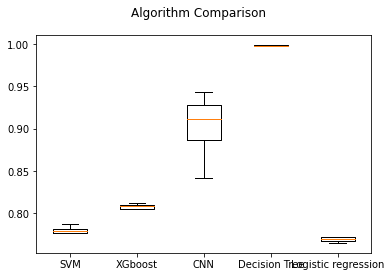

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(models_train_acc)
ax.set_xticklabels(models_names)
plt.show()